In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set()

In [3]:
raw_data=pd.read_csv(r'D:\ASHOK\imarticus\Dataset\data.csv')
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
data=raw_data.copy(deep=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
data.shape

(398, 9)

In [7]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [8]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [9]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
data=data[data.horsepower !='?']

In [11]:
data.shape

(392, 9)

In [12]:
data['horsepower']= data['horsepower'].astype('float')

In [13]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [14]:
data_1 = data.copy(deep='True')

In [15]:
data_1['origin']=data_1['origin'].astype('object')

In [16]:
data_1[['manufacturer','model']]= data_1['name'].str.split(' ',n=1, expand=True)
data_1.drop('name', axis=1, inplace=True)
data_1.head(1).T

,0
origin,1
cylinders,8
displacement,307.0
horsepower,130.0
weight,3504
acceleration,12.0
year,1970
Kilometer_per_liter,7.652587
manufacturer,chevrolet
model,chevelle malibu


In [17]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [18]:
errors={'vokswagen':'volkswagen','vw':'volkswagen', 'toyouta':'toyota', 'mercedes-benz':'mercedes','chevroelt':'chevrolet', 
       'chevy':'chevrolet', 'maxda':'mazda'}

In [19]:
data_1.manufacturer = data_1.manufacturer.map(errors).fillna(data_1.manufacturer)

In [20]:
print(data_1.manufacturer.unique())

['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'hi' 'mercury' 'opel'
 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault' 'honda' 'subaru'
 'capri' 'mercedes' 'cadillac' 'triumph' 'nissan']


In [21]:
data_1.model.head()

0    chevelle malibu
1        skylark 320
2          satellite
3          rebel sst
4             torino
Name: model, dtype: object

In [22]:
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

In [23]:
data_1.model= data_1.model.apply(lambda x:alphanumeric(x))

In [24]:
print(len(data_1.model.unique()))

293


In [25]:
data_1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [26]:
data_1.describe(include='O')

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,rabbit
freq,245,48,5


array([[<AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Kilometer_per_liter'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

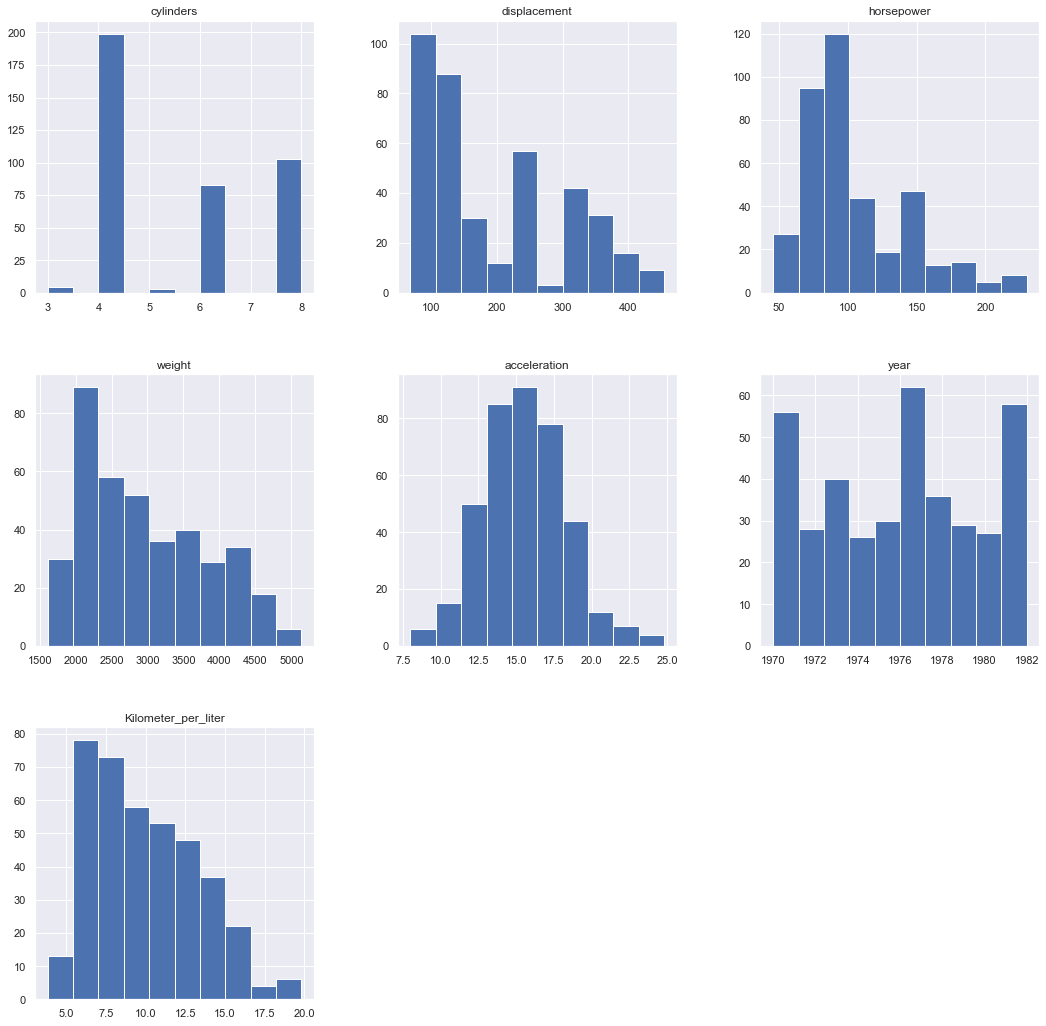

In [27]:
data_1.hist(figsize=(18,18))

In [28]:
data_1.Kilometer_per_liter.describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

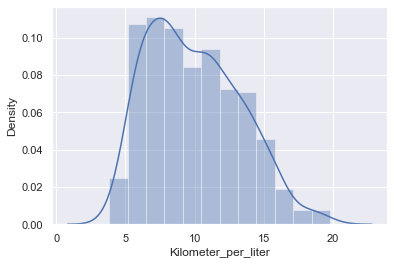

In [29]:
sns.distplot(data_1.Kilometer_per_liter)

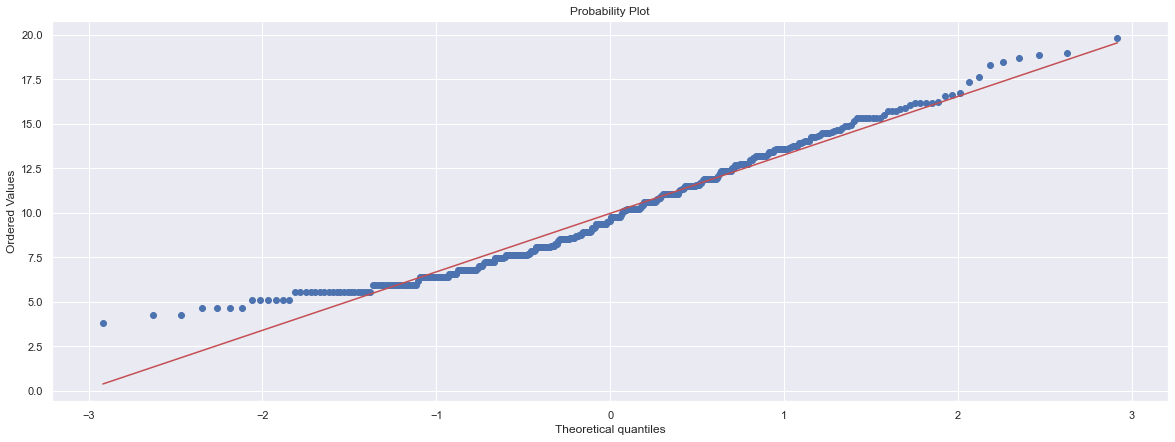

In [30]:
#qq plot
plt.figure(figsize=(20,7))
stats.probplot(data_1['Kilometer_per_liter'], plot=plt)
plt.show()

In [31]:
print('Skewness: %f' % data_1['Kilometer_per_liter'].skew())
print('Kurtosis: %f' % data_1['Kilometer_per_liter'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [63]:
# Not normally distributed, taking log

data_2= data_1.copy(deep=True)
data_2['log_mileage']= np.log(data_2['Kilometer_per_liter'])

In [64]:
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,log_mileage
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_mileage', ylabel='Density'>

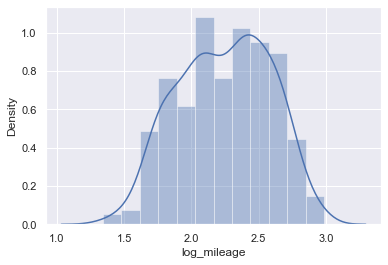

In [65]:
sns.distplot(data_2['log_mileage'])

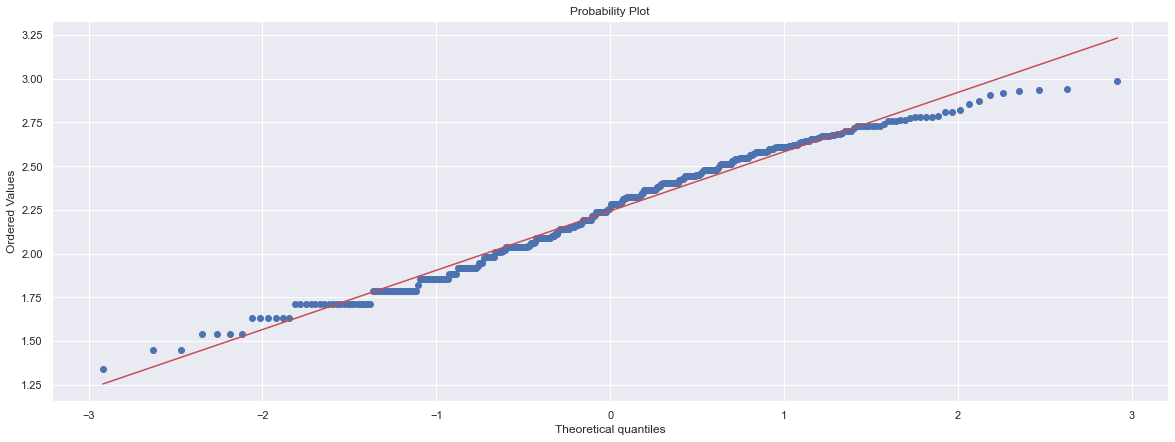

In [66]:
plt.figure(figsize=(20,7))
stats.probplot(data_2['log_mileage'], plot=plt)
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='count'>

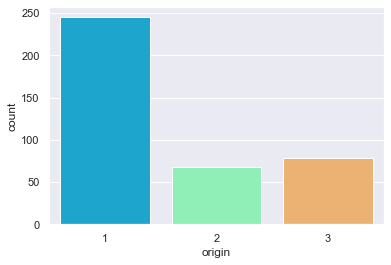

In [67]:
sns.countplot(data.origin, palette='rainbow')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

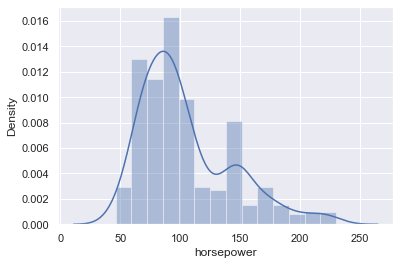

In [68]:
sns.distplot(data_2.horsepower)

In [69]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [70]:
from tabulate import tabulate

In [71]:
print(f'Cars from {data_2.manufacturer.nunique()} manufacturers (Top 10)')
print(tabulate(pd.DataFrame(data_2.manufacturer.value_counts()[:10])))

Cars from 30 manufacturers (Top 10)
----------  --
ford        48
chevrolet   47
plymouth    31
dodge       28
amc         27
toyota      26
datsun      23
volkswagen  22
buick       17
pontiac     16
----------  --


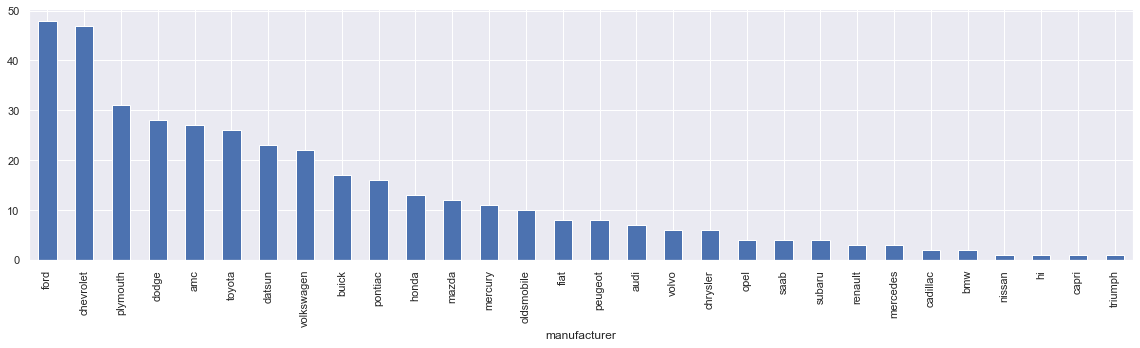

In [72]:
plt.figure(figsize =(16,5))
data_2.groupby('manufacturer')['manufacturer'].count().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

In [73]:
print(f'Cars from {data_2.model.nunique()} manufacturers (Top 10)')
print(tabulate(pd.DataFrame(data_2.model.value_counts()[:10])))

Cars from 293 manufacturers (Top 10)
--------  -
rabbit    5
pinto     5
corolla   5
matador   5
chevette  4
maverick  4
hornet    4
impala    4
corona    4
504       4
--------  -


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'corolla'),
  Text(1, 0, 'pinto'),
  Text(2, 0, 'matador'),
  Text(3, 0, 'rabbit'),
  Text(4, 0, 'impala'),
  Text(5, 0, '504'),
  Text(6, 0, 'maverick'),
  Text(7, 0, 'corona'),
  Text(8, 0, 'gremlin'),
  Text(9, 0, 'hornet'),
  Text(10, 0, 'chevette'),
  Text(11, 0, 'colt'),
  Text(12, 0, 'civic'),
  Text(13, 0, 'citation'),
  Text(14, 0, 'chevellemalibu'),
  Text(15, 0, 'catalina'),
  Text(16, 0, 'dasher'),
  Text(17, 0, 'duster'),
  Text(18, 0, 'furyiii'),
  Text(19, 0, 'galaxie500')])

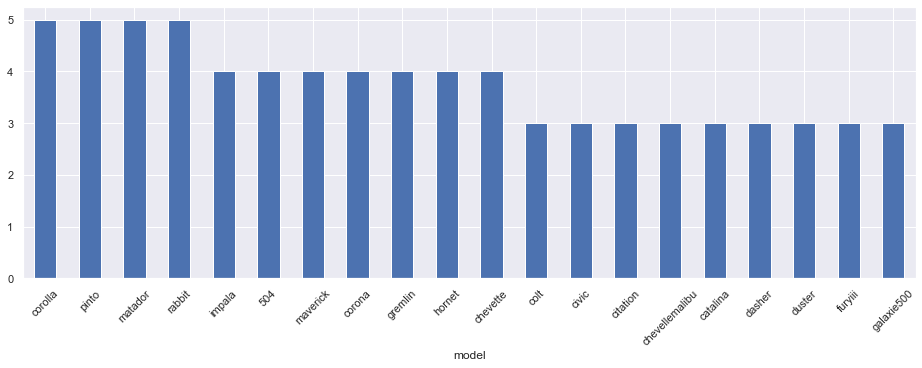

In [74]:
plt.figure(figsize=(16,5))
data_2.groupby('model')['model'].count().sort_values(ascending=False)[:20].plot(kind='bar')
plt.xticks(rotation=45)

In [75]:
x=data_2[['Kilometer_per_liter', 'horsepower']]

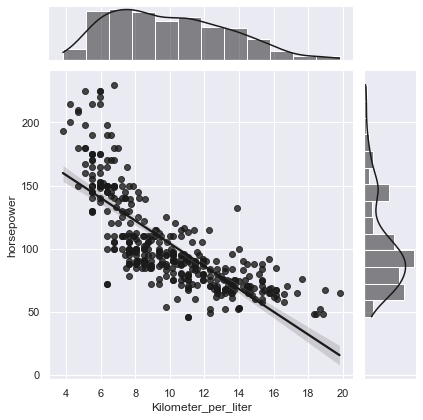

In [76]:
sns.jointplot(x=x.loc[:,'Kilometer_per_liter'], y=x.loc[:, 'horsepower'], kind='reg', color='k')

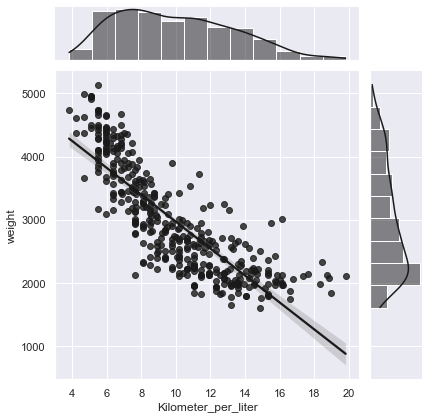

In [77]:
x=data_2[['Kilometer_per_liter', 'weight']]
sns.jointplot(x=x.loc[:,'Kilometer_per_liter'], y=x.loc[:, 'weight'], kind='reg', color='k')

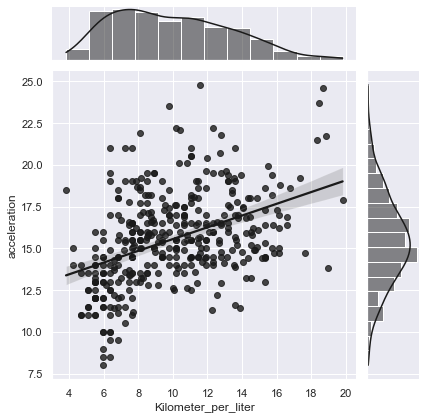

In [78]:
x=data_2[['Kilometer_per_liter', 'acceleration']]
sns.jointplot(x=x.loc[:,'Kilometer_per_liter'], y=x.loc[:, 'acceleration'], kind='reg', color='k')

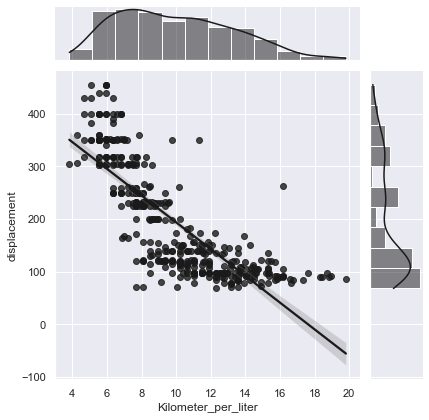

In [79]:
x=data_2[['Kilometer_per_liter', 'displacement']]
sns.jointplot(x=x.loc[:,'Kilometer_per_liter'], y=x.loc[:, 'displacement'], kind='reg', color='k')

<AxesSubplot:xlabel='cylinders', ylabel='Kilometer_per_liter'>

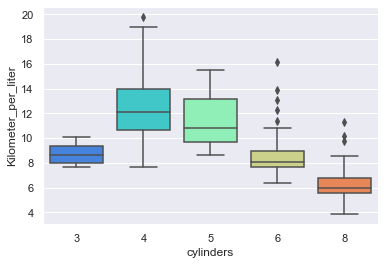

In [80]:
sns.boxplot(y='Kilometer_per_liter', x='cylinders', data=data_2, palette= 'rainbow')

<AxesSubplot:xlabel='year', ylabel='Kilometer_per_liter'>

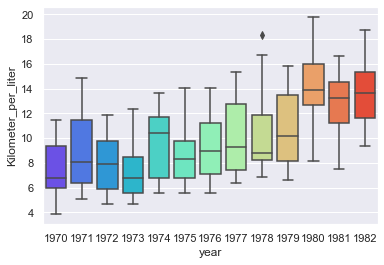

In [81]:
sns.boxplot(y='Kilometer_per_liter', x='year', data=data_2, palette= 'rainbow')

<AxesSubplot:>

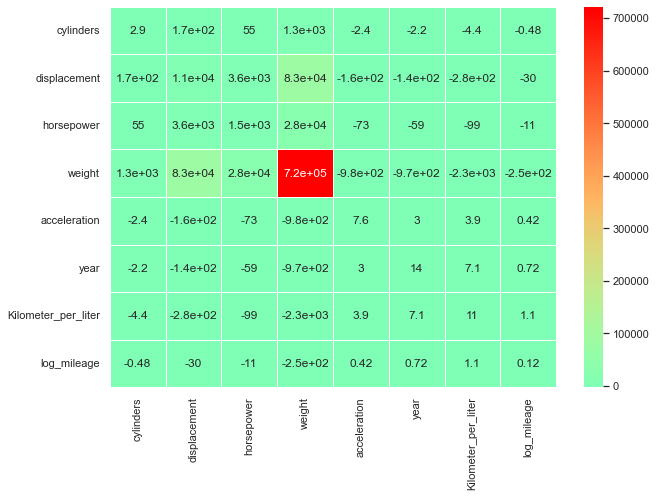

In [82]:
#covariance
plt.figure(figsize=(10,7))
sns.heatmap(data_2.cov(), annot=True, linewidth=0.5, center=0, cmap='rainbow')

<AxesSubplot:>

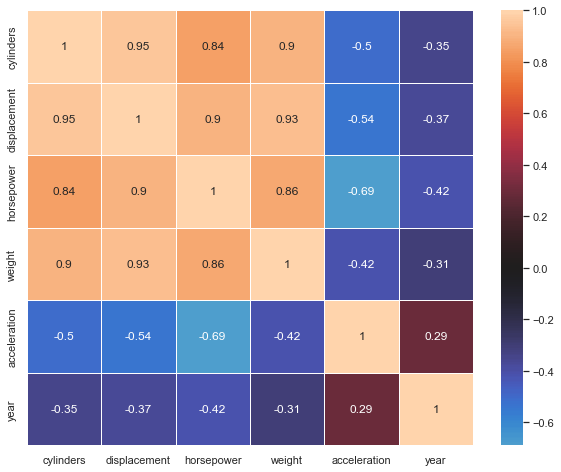

In [83]:
#correlation
data_num= data.drop(['Kilometer_per_liter','origin'], axis=1)
plt.figure(figsize=(10,8))
corr=data_num.corr()
sns.heatmap(data_num.corr(), annot=True, linewidth=0.5, center=0)

<AxesSubplot:>

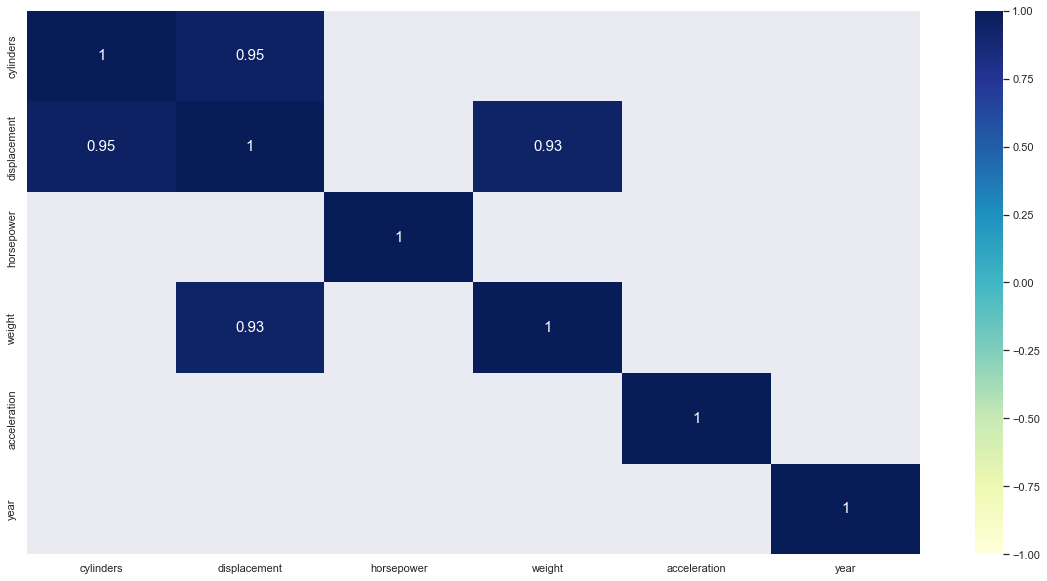

In [84]:
plt.figure(figsize=(20,10))
sns.heatmap(corr[(corr >= 0.9) | (corr<=-0.9)],
           cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot=True, annot_kws ={'size' : 15})

In [85]:
data_cleaned = data_2.drop(['displacement','model','weight','manufacturer'], axis=1)

In [86]:
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


In [87]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for feature in data_cleaned.select_dtypes(include='object').columns.values:
    data_cleaned[feature]=LE.fit_transform(data_cleaned[feature])

In [88]:
data_cleaned

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_mileage
0,0,8,130.0,12.0,1970,7.652587,2.035044
1,0,8,165.0,11.5,1970,6.377156,1.852722
2,0,8,150.0,11.0,1970,7.652587,2.035044
3,0,8,150.0,12.0,1970,6.802299,1.917261
4,0,8,140.0,10.5,1970,7.227443,1.977885
...,...,...,...,...,...,...,...
393,0,4,86.0,15.6,1982,11.478880,2.440509
394,1,4,52.0,24.6,1982,18.706323,2.928862
395,0,4,84.0,11.6,1982,13.604599,2.610408
396,0,4,79.0,18.6,1982,11.904024,2.476876


In [89]:
# Standardizing

from sklearn.preprocessing import MinMaxScaler
x=data_cleaned.drop(['Kilometer_per_liter','log_mileage'], axis=1)


In [90]:
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [92]:
X= scaler.fit_transform(x)

In [91]:
y = data_2.log_mileage

In [93]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.8, random_state=3)

In [95]:
from sklearn.linear_model import LinearRegression
OLS=LinearRegression()

In [96]:
OLS.fit(X_train,Y_train)

LinearRegression()

In [97]:
y_pred_OLS = OLS.predict(X_test)

In [102]:
r_squared_OLS = OLS.score(X_train,Y_train)

n=313
p=9
Adj_r_squared_OLS= 1- (1-r_squared_OLS)*(n-1)/(n-p-1)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(Y_test,y_pred_OLS))

In [103]:
cols=['model','R_squared','Adj_R_squared', 'RMSE']

result = pd.DataFrame(columns =cols)

In [108]:
OLS_metrics = pd.Series({'model': 'OLS', 'R_squared':r_squared_OLS,'Adj_R_squared':Adj_r_squared_OLS, 'RMSE':rmse_OLS})
result= result.append(OLS_metrics, ignore_index=True)
result

,model,R_squared,Adj_R_squared,RMSE
0,OLS,0.847697,0.843173,0.151662
1,OLS,0.847697,0.843173,0.151662


In [109]:
from sklearn.linear_model import SGDRegressor

In [110]:
SGD=SGDRegressor()
SGD.fit(X_train,Y_train)

SGDRegressor()

In [111]:
y_pred_SGD=SGD.predict(X_test)

In [112]:
r_squared_SGD = SGD.score(X_train,Y_train)

n=313
p=9
Adj_r_squared_SGD= 1- (1-r_squared_SGD)*(n-1)/(n-p-1)

rmse_SGD = sqrt(mean_squared_error(Y_test,y_pred_SGD))

In [114]:
SGD_metrics = pd.Series({'model': 'SGD', 'R_squared':r_squared_SGD,'Adj_R_squared':Adj_r_squared_SGD, 'RMSE':rmse_SGD})
result= result.append(SGD_metrics, ignore_index=True)
result

,model,R_squared,Adj_R_squared,RMSE
0,OLS,0.847697,0.843173,0.151662
1,OLS,0.847697,0.843173,0.151662
2,OLS,0.450510,0.434189,0.300257
3,SGD,0.450510,0.434189,0.300257
